## **Exploratory Data Analysis**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_defaults()

### **About Data**

*The data consist of New Yorks iconic yellow taxis recorded and provided by TLC. Records include fields*
1. `VendorID` - Data provided by vendors
2. `tpep_pickup_datetime` - pickup date and time
3. `tpep_dropoff_datetime` - drop off date and time
4. `passenger_count` - number of passengers in taxi
5. `trip_distance` - in miles
6. `RatecodeID` - rate codes
7. `PULocationID` - pickup location
8. `DOLocationID` - dropoff location
9. `payment_type` - mode of payment
10. `fare_amount` - time-distance charge by meter
11. `total_amount` - amount payed by passengers

In [20]:
nyc_taxi = pd.read_pickle("data/nyc_taxi.pickle")

### **Vendors**

*Most of the data is provided by two vendors*
1. **Creative Mobile Technologies, LLC**
2. **VeriFone Inc**
*These two vendors almost charge the `same amount` of money without any significant difference* 

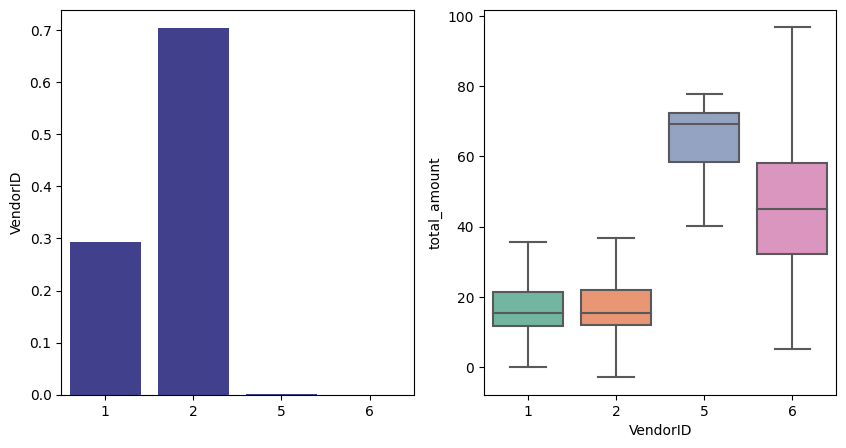

In [21]:
fig, axes = plt.subplots(ncols = 2, figsize=(10,5))
sns.barplot(x = nyc_taxi["VendorID"].unique(), 
            y = nyc_taxi["VendorID"].value_counts().sort_index()/len(nyc_taxi),
            color="navy", alpha=0.8,
            ax = axes[0])
sns.boxplot(data=nyc_taxi,
            x = "VendorID", y = "total_amount",
            palette= "Set2", showfliers = False,
            ax = axes[1]);

### **RatecodeID**

*The RatecodeId classification is as follows*
1. Standard rate
2. JFK
3. Newark
4. Nassau or Westchester
5. Negotiated fare
6. Group ride

*Barplot shows a large majority of ratecodes belong to Standard Rate, There is pretty `significant difference` for total amount payed by customers for `different` rate categories as described by the boxplot.*

*Category 2-5 cost significantly more*

*`Category 99` seems to be incorrectly classified and need to be reclassified properly*

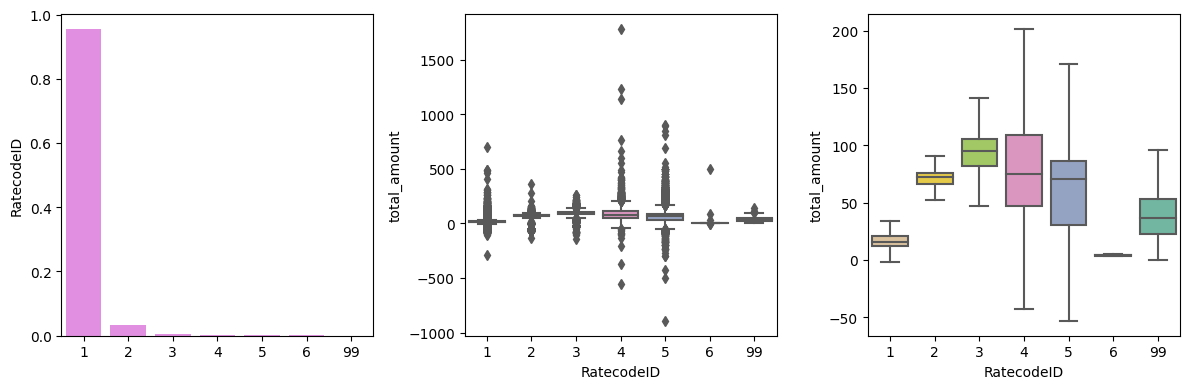

In [22]:
fig, axes = plt.subplots(ncols = 3, figsize=(12,4))
sns.barplot(x = nyc_taxi["RatecodeID"].unique(), 
            y = nyc_taxi["RatecodeID"].value_counts().sort_index()/len(nyc_taxi),
            color="violet",
            ax = axes[0])
sns.boxplot(data=nyc_taxi,
            x = "RatecodeID", y = "total_amount",
            palette="Set2_r", showfliers = True,
            ax = axes[1])
sns.boxplot(data=nyc_taxi,
            x = "RatecodeID", y = "total_amount",
            palette="Set2_r", showfliers = False,
            ax = axes[2])
plt.tight_layout();

### **Payment Type**

*The payment_type is divided into following categories:*

0. Voided trip
1. Credit card
2. Cash
3. No charge
4. Dispute
5. Unknown

*Most of the payments are done through `credit_card`, while `cash` is second major source of payment. On average credit card 
payment is slightly `larger` in amount in comparison to cash payment*

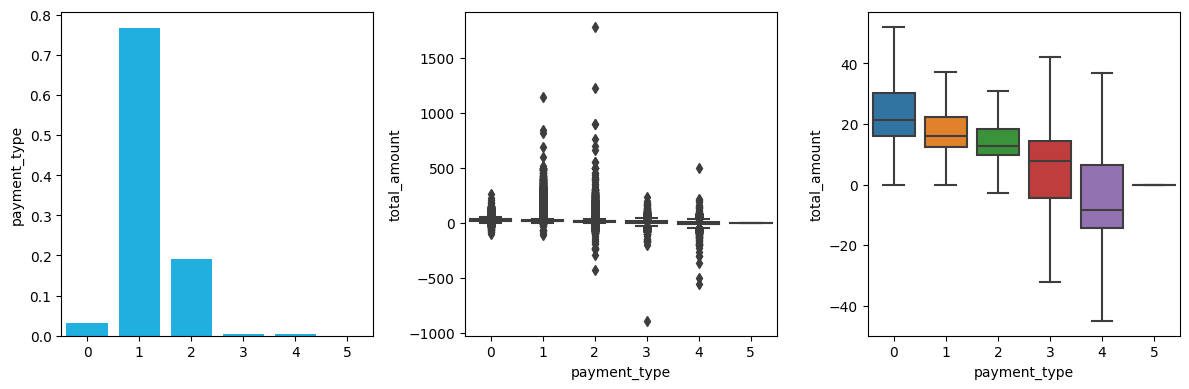

In [23]:
fig, axes = plt.subplots(ncols = 3, figsize=(12,4))
sns.barplot(x = np.sort(nyc_taxi["payment_type"].unique()), 
            y = nyc_taxi["payment_type"].value_counts().sort_index()/len(nyc_taxi),
            color="deepskyblue",
            ax = axes[0])
sns.boxplot(data=nyc_taxi,
            x = "payment_type", y = "total_amount",
            palette="tab10", showfliers=True,
            ax = axes[1])
sns.boxplot(data=nyc_taxi,
            x = "payment_type", y = "total_amount",
            palette="tab10", showfliers=False,
            ax = axes[2])
plt.tight_layout();

### **Passenger Count**

*Most of the time `single` or `double` passenger use the sevice, a small minority of 3+ passengers use the ride service,
there is no significant difference in price for upto `six` passengers*

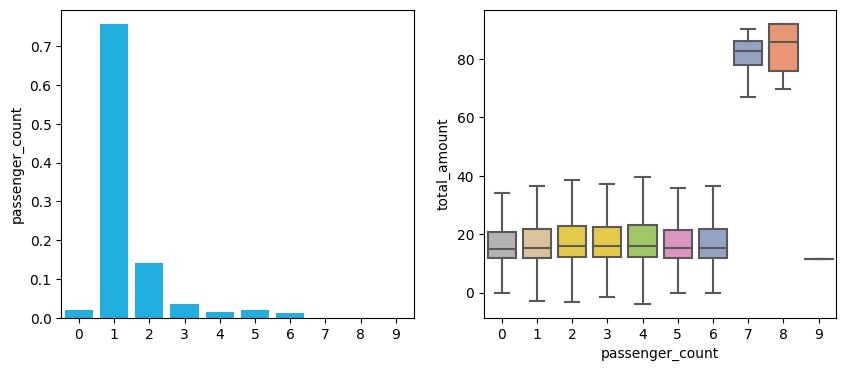

In [24]:
fig, axes = plt.subplots(ncols = 2, figsize=(10,4))
sns.barplot(x = np.sort(nyc_taxi["passenger_count"].unique()), 
            y = nyc_taxi["passenger_count"].value_counts().sort_index()/len(nyc_taxi),
            color="deepskyblue",
            ax = axes[0])
sns.boxplot(data=nyc_taxi,
            x = "passenger_count", y = "total_amount",
            palette= "Set2_r", showfliers = False,
            ax = axes[1]);

### **Ridership by Weekday**

*The taxi seems to get most pickups btween `tuesday` to `thursday` after that once the weekend starts the ridership starts to decrease 
until monday.*

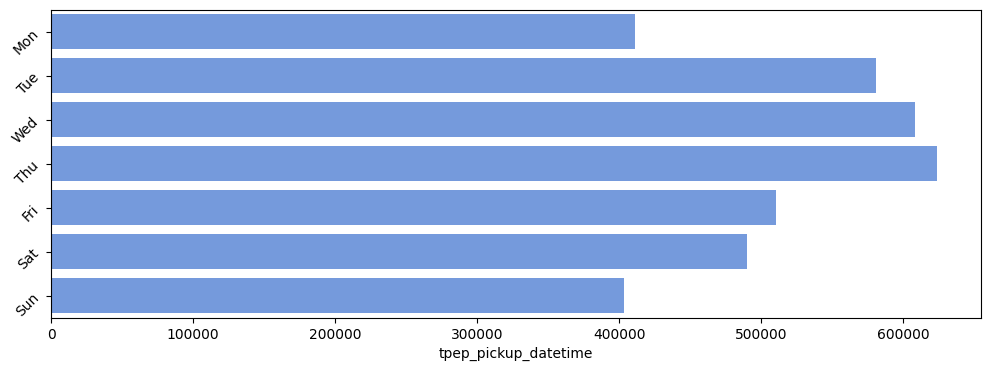

In [25]:
dow = nyc_taxi["tpep_pickup_datetime"].dt.dayofweek
plt.figure(figsize=(12,4))
plot = sns.barplot(y= np.sort(dow.unique()), x = dow.value_counts().sort_index(), orient="h", color="cornflowerblue")
plot.set_yticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], rotation=45);

### **Ridership by Hour**

*The demand for riding starts to grow by `5:00 am` and continue to do so upto `6:00 pm` where it peaks, after that the demand for taxi ride steadily decrease and become very low after 12:00 am.*

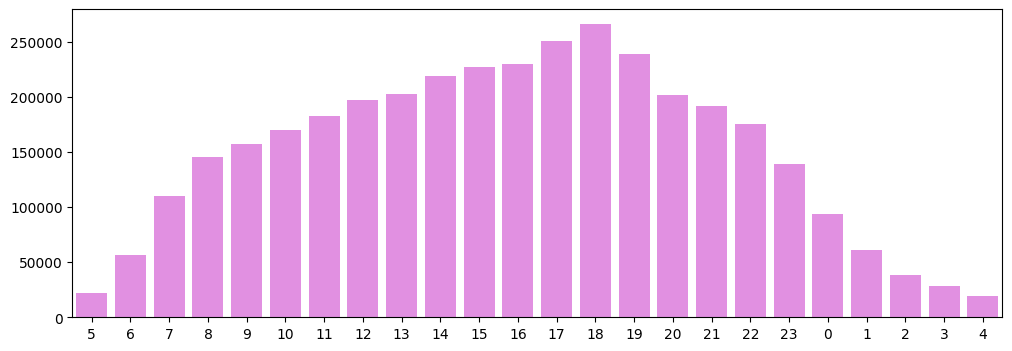

In [26]:
hour = nyc_taxi["tpep_pickup_datetime"].dt.hour
hour = hour.value_counts()
hour = hour.reindex(index=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4])
plt.figure(figsize=(12,4))
plot = sns.barplot(x= hour.index, y= hour.values, order=hour.index,  color="violet")

### **Trip Distance**

*From boxplot we can observe mean trip distance is around `1.8 mile` without any outliers, The distibution is approximately `normally` distributed for `log` values the smaller peak are places where distance is recorded as 0 which needed to be proccesed*

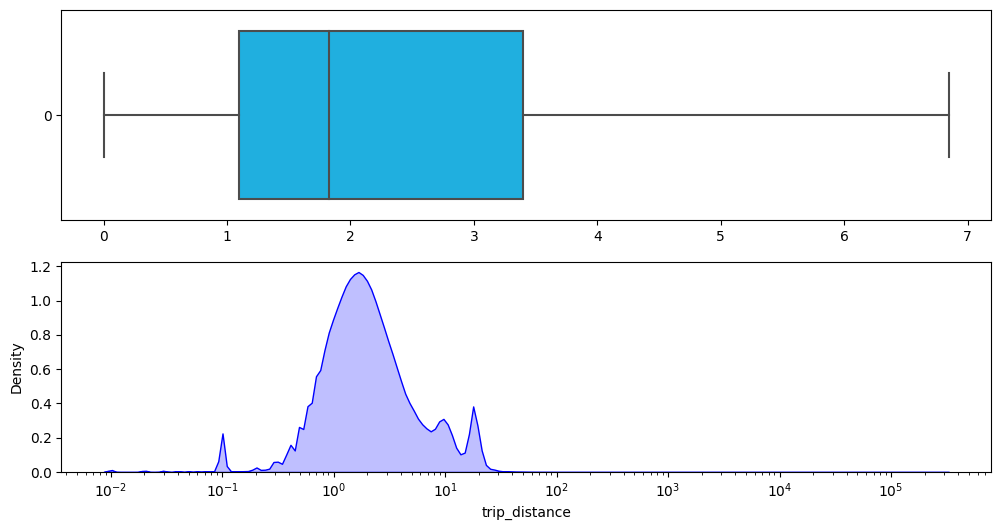

In [27]:
fig, axes = plt.subplots(nrows=2,figsize=(12,6))
sns.boxplot(data = nyc_taxi["trip_distance"], orient="h", color="deepskyblue", showfliers=False, ax = axes[0])
sns.kdeplot(nyc_taxi["trip_distance"].replace(0.0, 0.1), log_scale=True,color="blue", fill=True, ax=axes[1]);

### **Trip Amount**

*From boxplot we can observe that mean trip amount is close to `16$` without any outliers, from the distribution we can observe that
some of the instances have `negative values` and may be refunds recorded, the `log` of the trip amount is seems to be 
approximately `normal` in distribution as we can observe in the third figure*

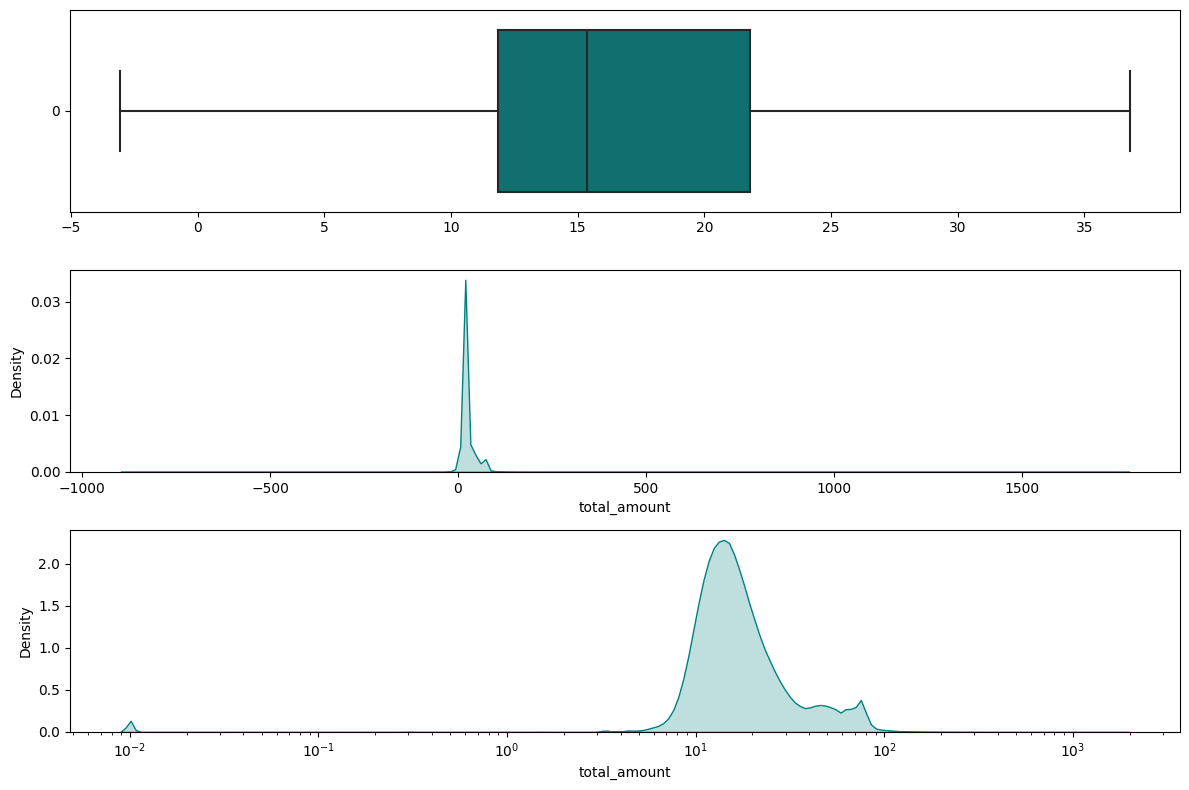

In [28]:
fig, axes = plt.subplots(nrows=3,figsize=(12,8))
sns.boxplot(data = nyc_taxi["total_amount"], orient="h", color="teal", showfliers=False, ax = axes[0])
sns.kdeplot(nyc_taxi["total_amount"],color="teal", fill=True, ax=axes[1]);
sns.kdeplot(nyc_taxi["total_amount"].clip(lower=0.01),log_scale=True, color="teal", fill=True, ax=axes[2])
plt.tight_layout()

### **Trip Frequency**

*This heatmap shows the frequency of trips from pickup to dropoff location, from the heatmap we can deduce a lot of important 
information*

*Dark colored regions show high demand for taxi ride which show high mobility within the area. Area with `dark horizontal green
lines` are routes where there is plenty of demand for yellow taxi rides.*

*The `diagonal` show people predfer to travel within the same location for a few mile tent using yellow taxis. `Dark squared green`
show the areas where people use rides to travel short distancesusing yellow taxis.*

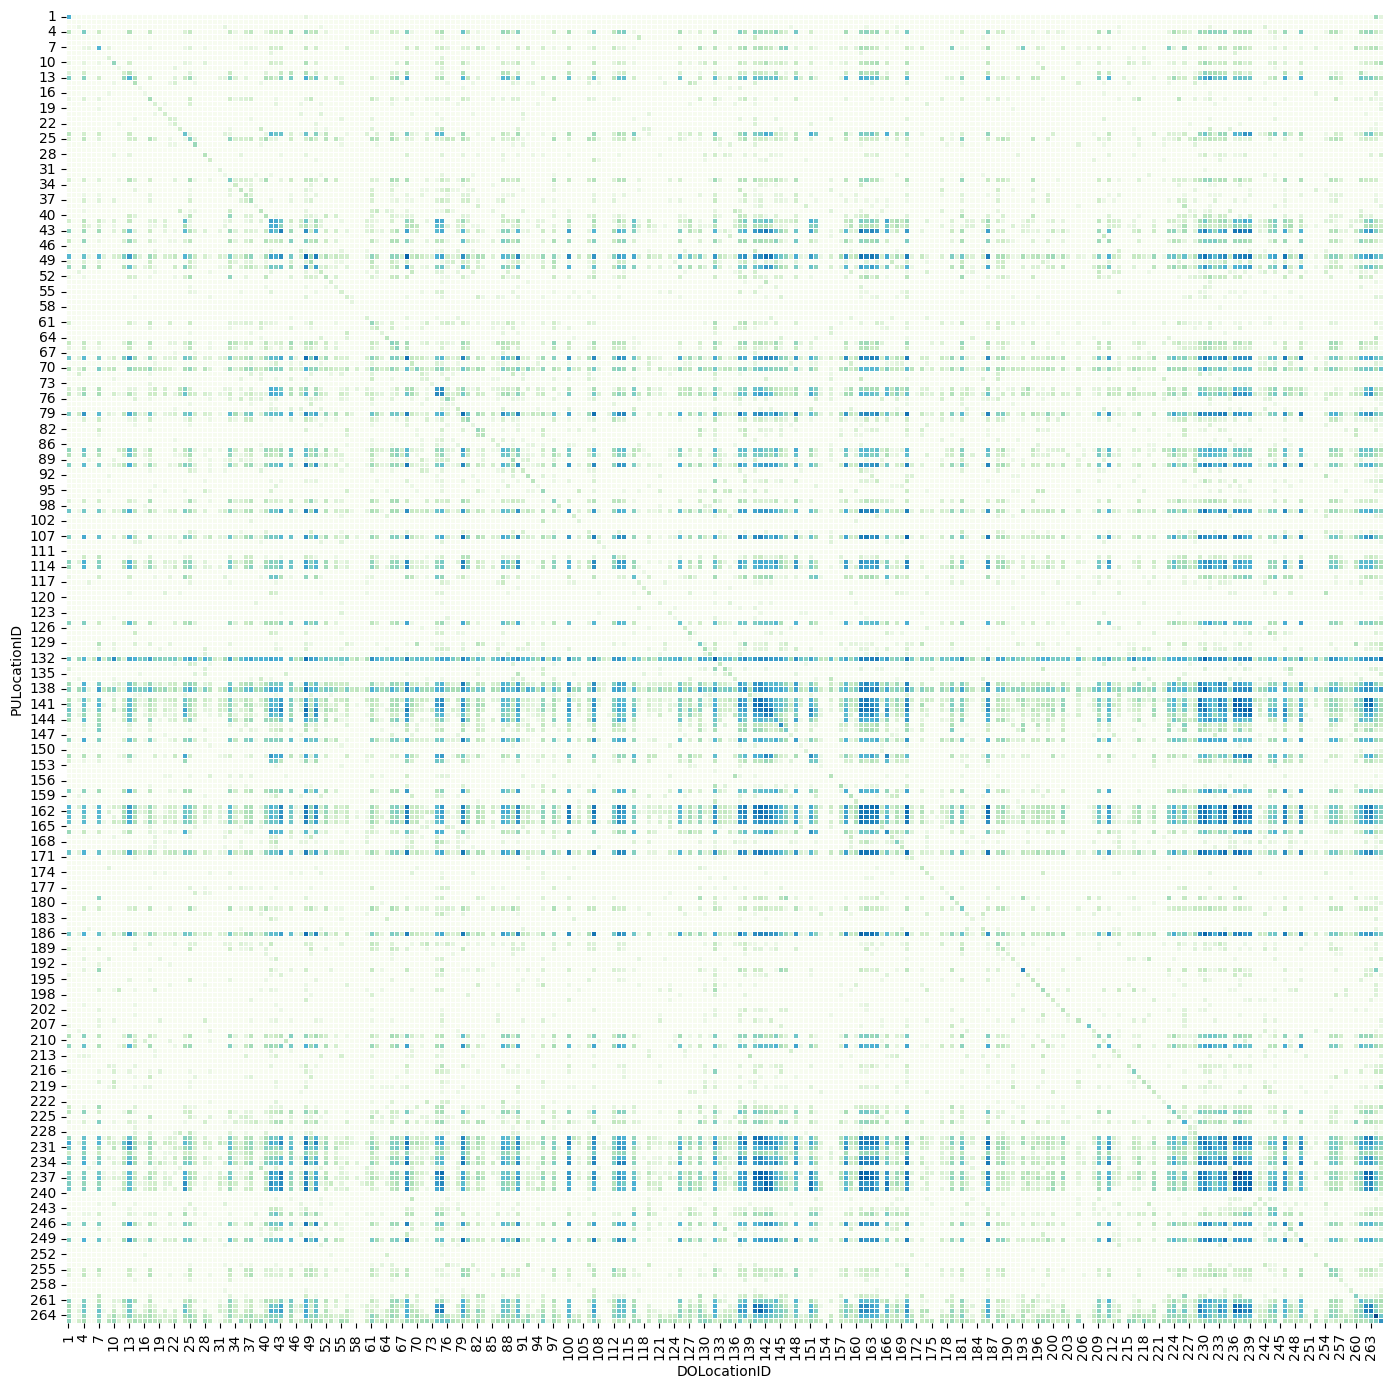

In [29]:
plt.figure(figsize=(17,17))
corr = np.log(pd.crosstab(nyc_taxi["PULocationID"], nyc_taxi["DOLocationID"]))
corr.replace(-np.inf, 0, inplace=True)
sns.heatmap(corr, cmap="GnBu", linewidths=0.5, cbar=False);